In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

### Content distribution of terpenoids

In [2]:
df=pd.read_csv('../../0 data preparation/All.csv')
df_dropduplicates=df.drop_duplicates(subset='ID')

In [3]:
type_list=['Monoterpenoids','Sesquiterpenoids','Diterpenoids','Triterpenoids']
content_list=[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10]
part_list=['Roots','Aerial parts','Whole plants','Leaves','Barks','Stems','Fruits','Seeds','Subterraneous stems','Flowers','Buds','Peels','Hooks','Woods','Husks','Seedling','Knots']
labels=['$[10^{-6},10^{-5})$','$[10^{-5},10^{-4})$','$[10^{-4},10^{-3})$','$[10^{-3},10^{-2})$',
        '$[10^{-2},10^{-1})$','$[10^{-1},1)$','$[1,10)$']

### 1. Minimum content and maximum content

In [4]:
print('Min_Content: '+ str(min(df['Content(%)'])))
print('Max_Content: '+ str(max(df['Content(%)'])))

Min_Content: 1e-06
Max_Content: 3.744898


### 2. The number of compounds in each content range

In [5]:
Content_Counts=[]
for j in range(len(content_list)):
    if j<=6:
        left=content_list[j]
        right=content_list[j+1]
        compound=df[(df['Content(%)']>=left)&(df['Content(%)']<right)]
        compound_dropduplicates=compound.drop_duplicates(subset='ID')
        Content_Counts.append((labels[j],len(compound),len(compound_dropduplicates)))
Content_Counts=pd.DataFrame(Content_Counts,columns=['Content','Records','Compounds'])
Content_Counts.set_index('Content',inplace=True)
Content_Counts.rename_axis(None, axis='index',inplace=True)
Content_Counts

,Records,Compounds
"$[10^{-6},10^{-5})$",152,145
"$[10^{-5},10^{-4})$",1404,1339
"$[10^{-4},10^{-3})$",3369,3080
"$[10^{-3},10^{-2})$",2021,1833
"$[10^{-2},10^{-1})$",476,439
"$[10^{-1},1)$",78,75
"$[1,10)$",8,8


### 3. The number of each category of terpenoids in each content range

In [6]:
Type_Content=pd.DataFrame(labels,columns=[''])
for i in type_list:
    type_content=[]
    for j in range(len(content_list)):
        if j<=6:
            left=content_list[j]
            right=content_list[j+1]
            compound=df[(df['Type']==i)&(df['Content(%)']>=left)&(df['Content(%)']<right)]
            compound_dropduplicates=compound.drop_duplicates(subset='ID')
            type_content.append(len(compound_dropduplicates))
    Type_Content[i]=type_content
Type_Content

,,Monoterpenoids,Sesquiterpenoids,Diterpenoids,Triterpenoids
0,"$[10^{-6},10^{-5})$",30,47,43,25
1,"$[10^{-5},10^{-4})$",208,296,333,502
2,"$[10^{-4},10^{-3})$",415,619,685,1361
3,"$[10^{-3},10^{-2})$",172,375,343,943
4,"$[10^{-2},10^{-1})$",61,97,16,265
5,"$[10^{-1},1)$",16,1,0,58
6,"$[1,10)$",0,1,1,6


<Figure size 576x432 with 0 Axes>

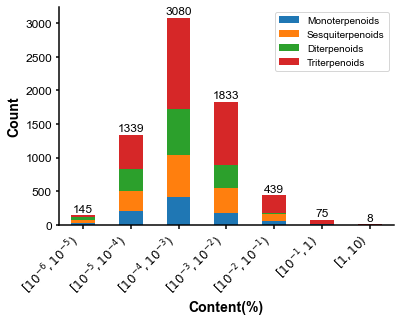

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data = {
    'Monoterpenoids': [30, 208, 415, 172, 61, 16, 0],
    'Sesquiterpenoids': [47, 296, 619, 375, 97, 1, 1],
    'Diterpenoids': [43, 333, 685, 343, 16, 0, 1],
    'Triterpenoids': [25, 502, 1361, 943, 265, 58, 6]
}
index=['$[10^{-6},10^{-5})$','$[10^{-5},10^{-4})$','$[10^{-4},10^{-3})$','$[10^{-3},10^{-2})$',
        '$[10^{-2},10^{-1})$','$[10^{-1},1)$','$[1,10)$']
df_content = pd.DataFrame(data, index=index)
row_totals = df_content.sum(axis=1)
plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Arial'
ax = df_content.plot(kind='bar', stacked=True)
plt.xlabel('Content(%)', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(0)
plt.gca().spines['top'].set_linewidth(0)
plt.tick_params(width=1.5)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
for i, total in enumerate(row_totals):
    ax.text(i, total + 50, str(total), ha='center', fontsize=12)
plt.legend()
plt.savefig('content.tif', dpi=600, bbox_inches='tight')
plt.show()

### 4. Distribution of terpenoids in various parts and content ranges

In [8]:
Part_Content=pd.DataFrame(labels,columns=[''])
for i in part_list:
    part_content=[]
    for j in range(len(content_list)):
        if j<=6:
            left=content_list[j]
            right=content_list[j+1]
            compound=df[(df['Part']==i)&(df['Content(%)']>=left)&(df['Content(%)']<right)]
            compound_dropduplicates=compound.drop_duplicates(subset='ID')
            part_content.append(len(compound_dropduplicates))
    Part_Content[i]=part_content
Part_Content.to_csv('Part_Content.csv',index=False)
Part_Content

,,Roots,Aerial parts,Whole plants,Leaves,Barks,Stems,Fruits,Seeds,Subterraneous stems,Flowers,Buds,Peels,Hooks,Woods,Husks,Seedling,Knots
0,"$[10^{-6},10^{-5})$",44,13,9,26,14,20,12,0,5,1,0,0,3,1,0,0,0
1,"$[10^{-5},10^{-4})$",342,204,221,174,72,135,59,58,55,9,10,3,16,6,4,0,0
2,"$[10^{-4},10^{-3})$",702,633,576,328,213,230,135,169,155,52,18,13,13,15,7,3,0
3,"$[10^{-3},10^{-2})$",422,388,266,281,149,79,109,98,47,27,23,19,6,16,4,0,3
4,"$[10^{-2},10^{-1})$",111,94,44,79,30,7,37,16,14,7,3,6,1,1,2,0,0
5,"$[10^{-1},1)$",18,6,10,17,6,2,6,4,2,3,0,2,0,0,0,0,0
6,"$[1,10)$",3,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0


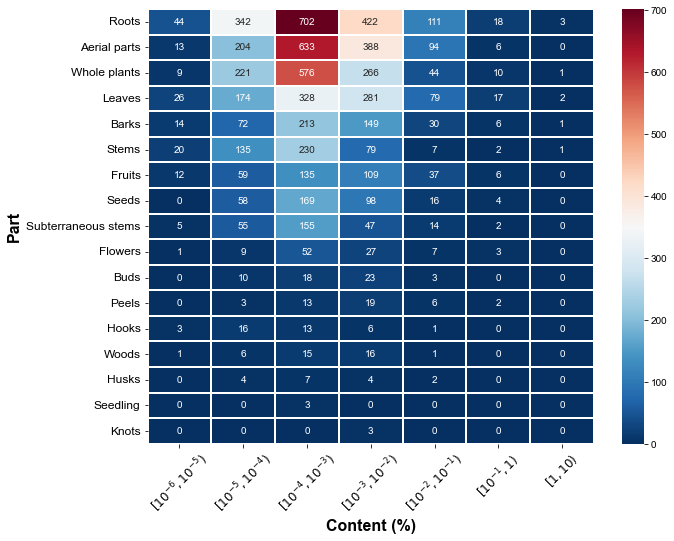

In [9]:
df_part_content = pd.read_csv('Part_content.csv',index_col=0)
df_part_content=df_part_content.transpose()
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Columns')
plt.ylabel('Rows')
ax=sns.heatmap(df_part_content, cmap='RdBu_r', linewidths=0.1, annot=True, fmt='d')
ax.set_xlabel('Content (%)', fontsize=16, fontweight='bold')
ax.set_ylabel('Part', fontsize=16, fontweight='bold')
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=45,fontsize=12)
plt.rcParams['font.sans-serif'] = 'Times New Roman'
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.savefig('heatmap_part_content.tif', dpi=600, bbox_inches='tight')
plt.show()